In [14]:
import pandas as pd
import os,sys

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

os.chdir('/data/arpit.goel/19_AllStateClaimsSeverityPrediction')

train = pd.read_csv('01.RawData/train.csv')
test = pd.read_csv('01.RawData/test.csv')

cat_columns = ['cat%d'%(x+1) for x in range(116)]
num_columns = ['cont%d'%(x+1) for x in range(14)]
target = 'loss'
uid = 'id'

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
1%          389.736800
5%          617.037000
10%         774.587000
25%        1204.460000
50%        2115.570000
75%        3864.045000
90%        6401.743000
95%        8508.536500
99%       13981.203000
max      121012.250000
Name: loss, dtype: float64


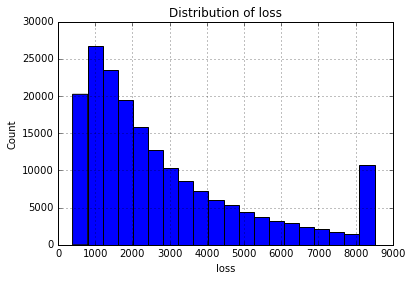

In [23]:
# Get distribution of target variable
print train[target].describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])
train['target_clean'] = np.clip(train[target],np.percentile(train[target],1),np.percentile(train[target],95))
train['target_clean'].hist(bins=20)
plt.title('Distribution of %s'%target)
plt.xlabel(target)
plt.ylabel('Count')

In [29]:
train['target_clean'].describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    188318.000000
mean       2860.667014
std        2194.801393
min         389.736800
1%          389.742444
5%          617.037000
10%         774.587000
25%        1204.460000
50%        2115.570000
75%        3864.045000
90%        6401.743000
95%        8508.496975
99%        8508.536500
max        8508.536500
Name: target_clean, dtype: float64

In [28]:
#Get Percentiles of target variable
np.percentile(train[target],range(101)).astype(np.float64)

array([  6.70000000e-01,   3.89736800e+02,   4.83337000e+02,
         5.40770800e+02,   5.80733600e+02,   6.17037000e+02,
         6.53000200e+02,   6.85291900e+02,   7.16333600e+02,
         7.45295300e+02,   7.74587000e+02,   8.02663500e+02,
         8.30800000e+02,   8.58562100e+02,   8.87257600e+02,
         9.14405500e+02,   9.42207200e+02,   9.70278900e+02,
         9.98521200e+02,   1.02599230e+03,   1.05513800e+03,
         1.08508570e+03,   1.11387660e+03,   1.14351460e+03,
         1.17427160e+03,   1.20446000e+03,   1.23572000e+03,
         1.26630360e+03,   1.29758520e+03,   1.32919860e+03,
         1.36014200e+03,   1.39325540e+03,   1.42587000e+03,
         1.45802050e+03,   1.49073000e+03,   1.52471800e+03,
         1.55882000e+03,   1.59386580e+03,   1.62997000e+03,
         1.66705630e+03,   1.70366000e+03,   1.74136910e+03,
         1.77971700e+03,   1.81844620e+03,   1.85805920e+03,
         1.89987650e+03,   1.94145820e+03,   1.98325960e+03,
         2.02738480e+03,

In [42]:
# Get unique values of categorical columns
from collections import Counter
train[cat_columns].apply(lambda x:set(x),axis=0).to_csv('02.Profile/CategoricalColumnsValues.csv')

In [50]:
# Transform 72 Categories to binary variables
binary_vars_raw = ['cat%d'%(x+1) for x in range(75)]
binary_vars_clean = ['clean_cat%d'%(x+1) for x in range(75)]

for x,y in zip(binary_vars_raw,binary_vars_clean):
    train[y] = train[x].map({'A':1,'B':0})
  
train[binary_vars_clean].mean().tolist()

[0.75165411697235529,
 0.56670631591244602,
 0.94517252732080836,
 0.68179887212056201,
 0.65706411495449191,
 0.69931180237683066,
 0.97571129684894697,
 0.94135451735893538,
 0.60069669389012204,
 0.85075776080884458,
 0.89309572106755597,
 0.84869741607281302,
 0.89662698201977509,
 0.98790875009292789,
 0.99981945432725494,
 0.96561666967576121,
 0.99304899159931603,
 0.99475886532354851,
 0.99039921834344036,
 0.99891672596352976,
 0.99780690109283232,
 0.999771662825646,
 0.83605921898066038,
 0.96632823203305052,
 0.90256374855297949,
 0.94053144149789192,
 0.89343557174566424,
 0.96081096868063598,
 0.98021962850072752,
 0.98110642636391632,
 0.97165432937902907,
 0.99356938795016936,
 0.99491817032891172,
 0.99689886256226168,
 0.99886893446192082,
 0.83004811011161972,
 0.88004864112830428,
 0.89913338077082383,
 0.97384742828619675,
 0.95646194203421875,
 0.96208009855669663,
 0.99099926719697529,
 0.97765481791437892,
 0.91715077687740953,
 0.97702290805977121,
 0.995316432